<a href="https://colab.research.google.com/github/s10955031/bigdata/blob/main/0518.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("SportsAnalytics")
install.packages("ggplot2")
library(SportsAnalytics)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



`geom_smooth()` using formula 'y ~ x'




Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1213)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -85.9622              0.4733  


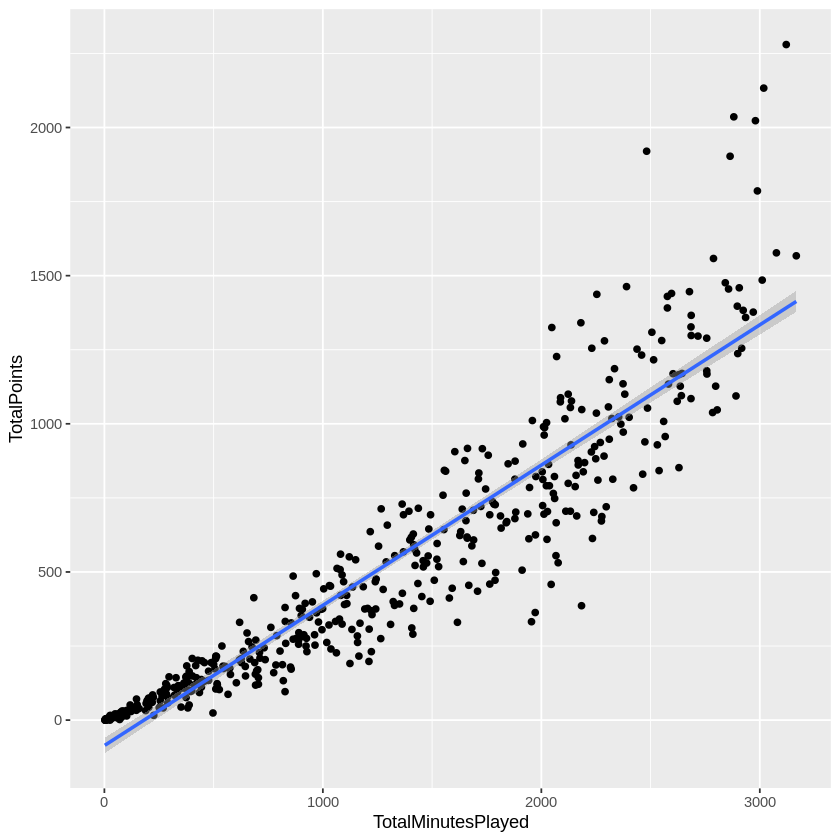

In [3]:
NBA1213<-fetch_NBAPlayerStatistics("12-13")
ggplot(NBA1213,aes(x=TotalMinutesPlayed,y=TotalPoints))+geom_point()+geom_smooth(method = "glm")
lm(TotalPoints~TotalMinutesPlayed,data =NBA1213)

In [4]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,data =NBA1213)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1213)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
          -21.67191              0.01152              1.21292  

Degrees of Freedom: 468 Total (i.e. Null);  466 Residual
Null Deviance:	    93940000 
Residual Deviance: 2104000 	AIC: 5283

In [5]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,
    data =NBA1213)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1213)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
           3.864030             0.006798             1.229093  
         PositionPF           PositionPG           PositionSF  
         -28.998119           -39.128044           -22.430181  
         PositionSG  
         -35.288822  

Degrees of Freedom: 468 Total (i.e. Null);  462 Residual
Null Deviance:	    93940000 
Residual Deviance: 2024000 	AIC: 5272

In [6]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [7]:
head(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [8]:
mydata$rank <- factor(mydata$rank)
mylogit <- glm(admit ~ gre + gpa + rank, data = mydata, family = "binomial")
sum<-summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


In [10]:
install.packages("rpart")
library(rpart)
DT <- rpart(Position~Blocks+ThreesMade+Assists+Steals, data=NBA1213)
DT

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



n= 469 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 469 363 PG (0.17 0.22 0.23 0.17 0.21)  
    2) ThreesMade< 3.5 186 110 C (0.41 0.36 0.07 0.11 0.054)  
      4) Blocks>=1.5 147  79 C (0.46 0.44 0.027 0.054 0.014)  
        8) Blocks>=32.5 73  28 C (0.62 0.34 0.014 0.027 0) *
        9) Blocks< 32.5 74  34 PF (0.31 0.54 0.041 0.081 0.027)  
         18) Steals< 7.5 27  12 C (0.56 0.41 0 0.037 0)  
           36) Blocks>=7.5 10   1 C (0.9 0.1 0 0 0) *
           37) Blocks< 7.5 17   7 PF (0.35 0.59 0 0.059 0) *
         19) Steals>=7.5 47  18 PF (0.17 0.62 0.064 0.11 0.043) *
      5) Blocks< 1.5 39  27 SF (0.21 0.051 0.23 0.31 0.21)  
       10) Assists< 0.5 11   6 C (0.45 0.091 0.36 0.091 0) *
       11) Assists>=0.5 28  17 SF (0.11 0.036 0.18 0.39 0.29) *
    3) ThreesMade>=3.5 283 190 PG (0.014 0.13 0.33 0.22 0.31)  
      6) Assists>=229 64  18 PG (0 0.031 0.72 0.094 0.16) *
      7) Assists< 229 219 142 SG (0.018 0.16 0.21 0.26 0.35)  
       1

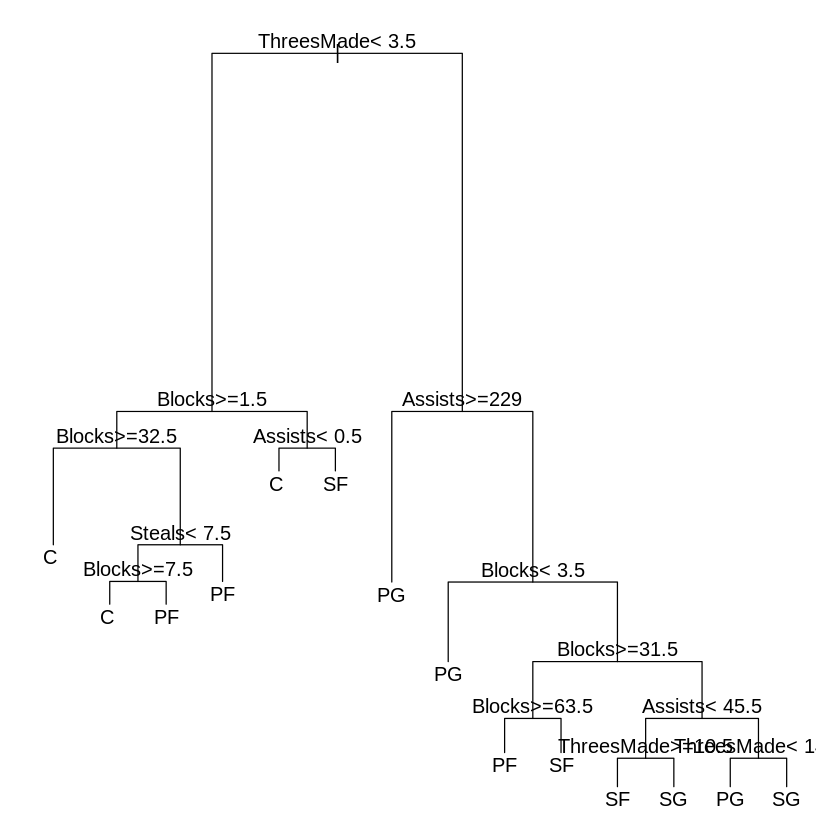

In [11]:
par(mfrow=c(1,1), mar = rep(1,4)) #下,左,上,右
plot(DT)
text(DT, use.n=F, all=F, cex=1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



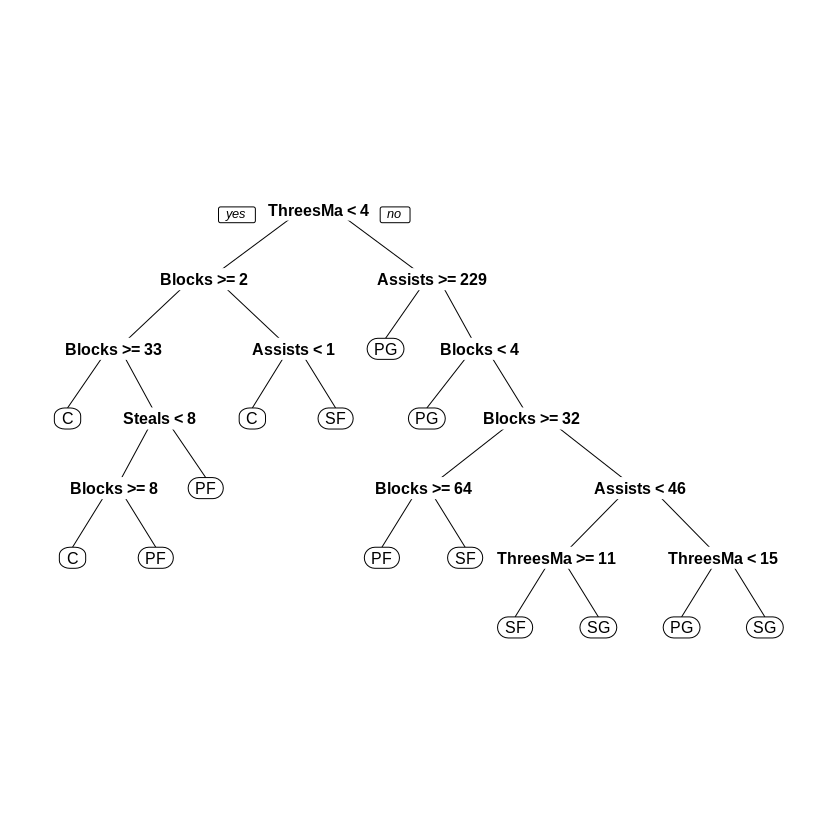

In [12]:
install.packages("rpart.plot")

library(rpart.plot)
prp(DT)	

`geom_smooth()` using formula 'y ~ x'




Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1415)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -72.2028              0.4727  


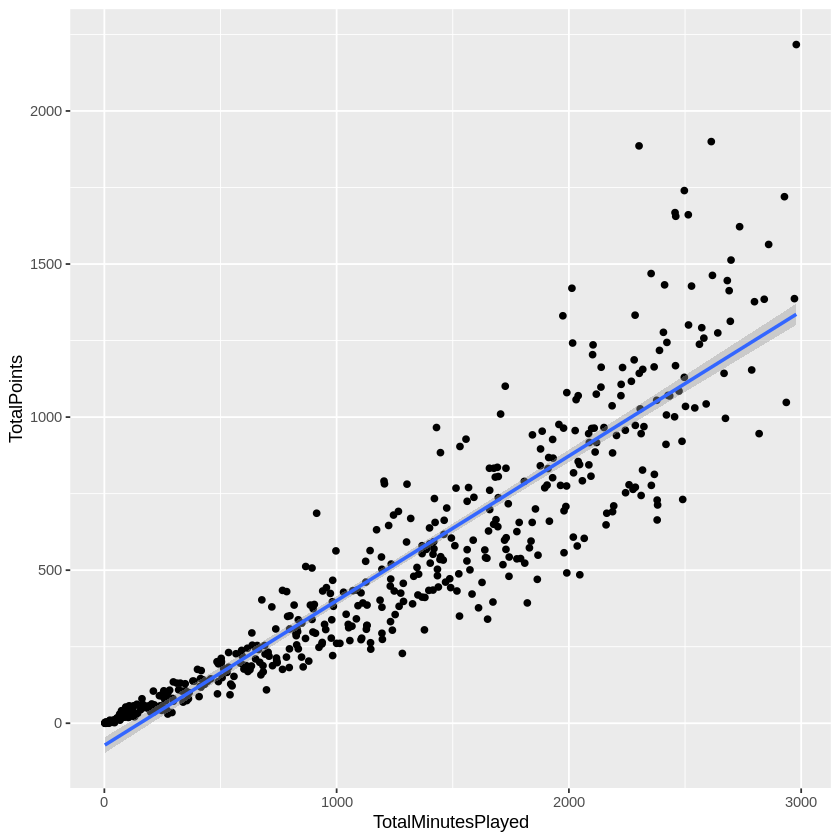

In [14]:
NBA1415<-fetch_NBAPlayerStatistics("14-15")
ggplot(NBA1415,aes(x=TotalMinutesPlayed,y=TotalPoints))+geom_point()+geom_smooth(method = "glm")
lm(TotalPoints~TotalMinutesPlayed,data =NBA1415)

In [15]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,data =NBA1415)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1415)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
          -20.27364              0.01392              1.20496  

Degrees of Freedom: 491 Total (i.e. Null);  489 Residual
Null Deviance:	    87620000 
Residual Deviance: 1938000 	AIC: 5477

In [16]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,
    data =NBA1415)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1415)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
          10.348285             0.006505             1.226523  
         PositionPF           PositionPG           PositionSF  
         -24.794091           -47.702148           -30.497817  
         PositionSG  
         -40.784959  

Degrees of Freedom: 491 Total (i.e. Null);  485 Residual
Null Deviance:	    87620000 
Residual Deviance: 1830000 	AIC: 5457

In [17]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [18]:
head(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [19]:
mydata$rank <- factor(mydata$rank)
mylogit <- glm(admit ~ gre + gpa + rank, data = mydata, family = "binomial")
sum<-summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


In [21]:
install.packages("rpart")
library(rpart)
DT <- rpart(Position~Blocks+ThreesMade+Assists+Steals, data=NBA1415)
DT

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



n= 492 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 492 375 PF (0.14 0.24 0.21 0.18 0.23)  
    2) ThreesMade< 2.5 150  88 C (0.41 0.39 0.073 0.06 0.067)  
      4) Blocks>=38.5 54  14 C (0.74 0.26 0 0 0) *
      5) Blocks< 38.5 96  52 PF (0.23 0.46 0.11 0.094 0.1) *
    3) ThreesMade>=2.5 342 238 SG (0.026 0.17 0.26 0.23 0.3)  
      6) Assists>=186 93  39 PG (0.011 0.086 0.58 0.054 0.27)  
       12) Blocks>=33 20  13 PF (0.05 0.35 0.1 0.2 0.3)  
         24) ThreesMade< 78 12   5 PF (0.083 0.58 0.083 0 0.25) *
         25) ThreesMade>=78 8   4 SF (0 0 0.12 0.5 0.38) *
       13) Blocks< 33 73  21 PG (0 0.014 0.71 0.014 0.26) *
      7) Assists< 186 249 170 SG (0.032 0.2 0.14 0.3 0.32)  
       14) Blocks>=6.5 162 103 SF (0.049 0.28 0.012 0.36 0.3)  
         28) Blocks>=31.5 33  14 PF (0.091 0.58 0 0.21 0.12) *
         29) Blocks< 31.5 129  77 SF (0.039 0.2 0.016 0.4 0.34)  
           58) ThreesMade< 9.5 14   5 PF (0.071 0.64 0 0.14 0.14) *
     

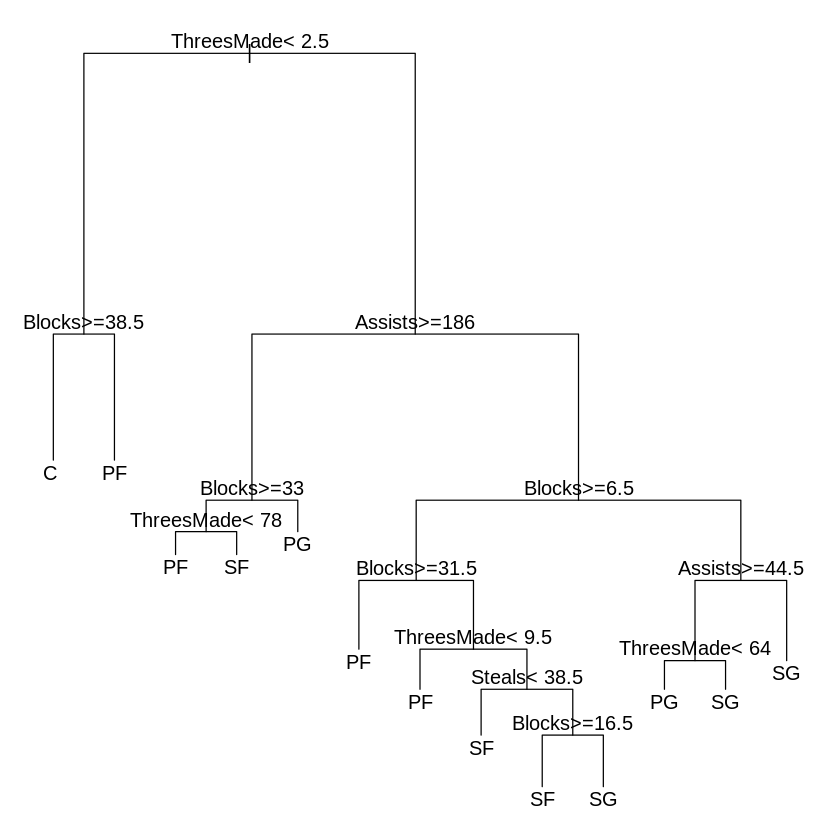

In [22]:
par(mfrow=c(1,1), mar = rep(1,4)) #下,左,上,右
plot(DT)
text(DT, use.n=F, all=F, cex=1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



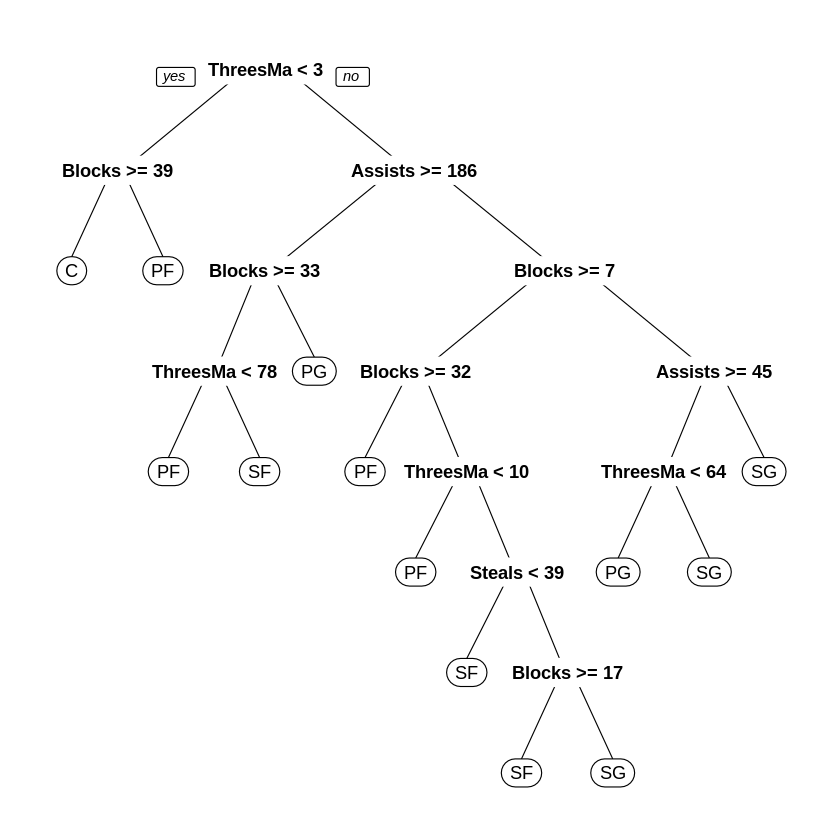

In [23]:
install.packages("rpart.plot")

library(rpart.plot)
prp(DT)	

In [24]:
install.packages("arules")
library(arules)

install.packages("datasets")
library(datasets) 
data(Groceries)
Groceries@data@Dim 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”


[1]  169 9835

In [25]:
rules <- apriori(Groceries, 
          parameter = list(supp = 0.001, conf = 0.8), 
          control = list(verbose=F)) 
options(digits=2) 
inspect(rules[1:5]) 

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [26]:
rules<-sort(rules, by="confidence", decreasing=TRUE) 
inspect(rules[1:5]) 

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [27]:
rulesR<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.08),
        appearance = list(default="lhs",rhs="whole milk"), 
        control = list(verbose=F)) 
rulesR<-sort(rulesR, decreasing=TRUE,by="confidence") 
inspect(rulesR[1:5]) 

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [28]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
        appearance = list(default="rhs",lhs="whole milk"), 
        control = list(verbose=F)) 
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") 
inspect(rulesL[1:5]) 

    lhs             rhs                support confidence coverage lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       0.26     1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       0.26     1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       0.26     1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       0.26     1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       0.26     1.6  416  


In [29]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
        appearance = list(default="rhs",lhs="tropical fruit"), 
        control = list(verbose=F)) 
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") 
inspect(rulesL[1:5]) 

    lhs                 rhs                support confidence coverage lift
[1] {tropical fruit} => {whole milk}       0.042   0.40       0.1      1.6 
[2] {tropical fruit} => {other vegetables} 0.036   0.34       0.1      1.8 
[3] {tropical fruit} => {yogurt}           0.029   0.28       0.1      2.0 
[4] {tropical fruit} => {rolls/buns}       0.025   0.23       0.1      1.3 
[5] {tropical fruit} => {root vegetables}  0.021   0.20       0.1      1.8 
    count
[1] 416  
[2] 353  
[3] 288  
[4] 242  
[5] 207  


In [30]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
        appearance = list(default="lhs",rhs="whole milk"), 
        control = list(verbose=F)) 
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") 
inspect(rulesL[1:5]) 

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [31]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
        appearance = list(default="rhs",lhs="bottled beer"), 
        control = list(verbose=F)) 
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") 
inspect(rulesL[1:5]) 

    lhs               rhs                support confidence coverage lift count
[1] {bottled beer} => {whole milk}       0.020   0.25       0.081    0.99 201  
[2] {bottled beer} => {soda}             0.017   0.21       0.081    1.21 167  
[3] {bottled beer} => {other vegetables} 0.016   0.20       0.081    1.04 159  
[4] {bottled beer} => {bottled water}    0.016   0.20       0.081    1.77 155  
[5] {bottled beer} => {rolls/buns}       0.014   0.17       0.081    0.92 134  


In [32]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
        appearance = list(default="rhs",lhs="root vegetables"), 
        control = list(verbose=F)) 
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") 
inspect(rulesL[1:5]) 

    lhs                  rhs                support confidence coverage lift
[1] {root vegetables} => {whole milk}       0.049   0.45       0.11     1.8 
[2] {root vegetables} => {other vegetables} 0.047   0.43       0.11     2.2 
[3] {root vegetables} => {yogurt}           0.026   0.24       0.11     1.7 
[4] {root vegetables} => {rolls/buns}       0.024   0.22       0.11     1.2 
[5] {root vegetables} => {tropical fruit}   0.021   0.19       0.11     1.8 
    count
[1] 481  
[2] 466  
[3] 254  
[4] 239  
[5] 207  


In [33]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
        appearance = list(default="rhs",lhs="yogurt"), 
        control = list(verbose=F)) 
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") 
inspect(rulesL[1:5]) 

    lhs         rhs                support confidence coverage lift count
[1] {yogurt} => {whole milk}       0.056   0.40       0.14     1.6  551  
[2] {yogurt} => {other vegetables} 0.043   0.31       0.14     1.6  427  
[3] {yogurt} => {rolls/buns}       0.034   0.25       0.14     1.3  338  
[4] {yogurt} => {tropical fruit}   0.029   0.21       0.14     2.0  288  
[5] {yogurt} => {soda}             0.027   0.20       0.14     1.1  269  


In [34]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
        appearance = list(default="lhs",rhs="soda"), 
        control = list(verbose=F)) 
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") 
inspect(rulesL[1:5]) 

    lhs                                             rhs    support confidence
[1] {coffee,misc. beverages}                     => {soda} 0.0010  0.77      
[2] {yogurt,rolls/buns,bottled water,newspapers} => {soda} 0.0010  0.77      
[3] {sausage,bottled water,bottled beer}         => {soda} 0.0011  0.73      
[4] {sausage,white bread,shopping bags}          => {soda} 0.0010  0.67      
[5] {rolls/buns,bottled water,chocolate}         => {soda} 0.0013  0.65      
    coverage lift count
[1] 0.0013   4.4  10   
[2] 0.0013   4.4  10   
[3] 0.0015   4.2  11   
[4] 0.0015   3.8  10   
[5] 0.0020   3.7  13   
